In [4]:
import joblib 
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from experiments_helpers import ExperimentResults

if 'src' in os.getcwd():
    os.chdir('..')
    print(os.getcwd())

folder = 'results_bench'
name = 'torch-german-gs-twods-a6'

idx = 0
es_base: ExperimentResults = ExperimentResults.load_results_from_file(f'{folder}/{name}_{idx}.joblib')

es_base.pretty_print_robust_vs_base()

ExperimentResults with 18 metrics and 0 artifacts.
############################## Metrics ##############################
------------------------- Base metrics -------------------------
validity: 1.00 (std: 0.00)
proximityL1: 20.84 (std: 2.80)
lof: -1.99 (std: 0.23)
cf_counterfactual_stability: 0.62 (std: 0.18)
generation_time: 0.01 (std: 0.01)
------------------------- Base metrics 2 -------------------------
validity_2: 0.80 (std: 0.40)
proximityL1_2: 20.84 (std: 2.80)
lof_2: -1.99 (std: 0.23)
cf_counterfactual_stability_2: 0.61 (std: 0.15)
------------------------- Robust metrics -------------------------
robust_validity: nan (std: nan)
robust_proximityL1: nan (std: nan)
robust_lof: nan (std: nan)
robust_cf_counterfactual_stability: nan (std: nan)
robust_generation_time: 118.99 (std: 126.41)
------------------------- Robust metrics 2 -------------------------
robust_validity_2: nan (std: nan)
robust_proximityL1_2: nan (std: nan)
robust_lof_2: nan (std: nan)
robust_cf_counterfactual_

In [5]:
es_base.get_results_as_pandas().dropna()

,validity,proximityL1,lof,cf_counterfactual_stability,validity_2,proximityL1_2,lof_2,cf_counterfactual_stability_2,generation_time,robust_validity,robust_proximityL1,robust_lof,robust_cf_counterfactual_stability,robust_validity_2,robust_proximityL1_2,robust_lof_2,robust_cf_counterfactual_stability_2,robust_generation_time
2,1,24.163216,-2.328551,0.494881,1,24.163216,-2.328551,0.645370,0.003741,1.0,27.170838,-2.139702,0.610240,1.0,27.170838,-2.139702,0.589101,55.685188
3,1,20.076430,-1.835102,0.887767,1,20.076430,-1.835102,0.748493,0.003361,1.0,26.250121,-2.303054,0.928893,1.0,26.250121,-2.303054,0.815653,36.509047
6,1,17.151407,-1.928649,0.821307,1,17.151407,-1.928649,0.879699,0.004277,1.0,24.179453,-2.153923,0.612662,1.0,24.179453,-2.153923,0.734144,33.296858
8,1,18.026238,-1.908297,0.807424,1,18.026238,-1.908297,0.749397,0.003678,1.0,23.184153,-2.228356,0.956159,1.0,23.184153,-2.228356,0.882748,35.485083
10,1,17.117782,-1.846491,0.975783,1,17.117782,-1.846491,0.975506,0.003592,1.0,27.113277,-2.379524,0.967188,1.0,27.113277,-2.379524,0.960587,33.987078
16,1,24.102508,-1.911423,0.450379,1,24.102508,-1.911423,0.589387,0.005409,1.0,24.076859,-2.204085,0.571966,1.0,24.076859,-2.204085,0.521089,58.789778
19,1,23.101947,-2.113017,0.436299,0,23.101947,-2.113017,0.462796,0.003355,1.0,26.552202,-2.204474,0.521761,0.0,26.552202,-2.204474,0.662025,163.324332
20,1,17.044868,-2.139685,0.867928,1,17.044868,-2.139685,0.807905,0.005701,1.0,26.161632,-2.280194,0.895683,1.0,26.161632,-2.280194,0.820775,35.194645
21,1,18.170189,-1.958465,0.902458,1,18.170189,-1.958465,0.700857,0.005613,1.0,26.159263,-2.388592,0.998829,1.0,26.159263,-2.388592,0.995578,34.813362
24,1,21.038237,-2.250066,0.477001,1,21.038237,-2.250066,0.504915,0.003756,1.0,24.050369,-2.204754,0.609519,1.0,24.050369,-2.204754,0.660280,58.610240


In [6]:
res = es_base.get_results_as_pandas()
res = res.dropna() #TODO investigate what causes nulls 
res = res[res['robust_validity'] > 0] #TODO fix so robust cf is always valid for model 1
cols = [x for x in res.columns if 'validity' in x]
res[cols].mean()

validity             1.000000
validity_2           0.826087
robust_validity      1.000000
robust_validity_2    0.869565
dtype: float64

In [71]:
name = 'torch-german-gs-a'

robs = []
robs_std = []

threshs = np.array([6,7,8,9])
for i, a in enumerate(threshs):
    f = f'{folder}/{name}{a}_0.joblib'
    print(f)
    er = ExperimentResults.load_results_from_file(f)
    res = er.get_results_as_pandas()
    res = res.dropna() #TODO investigate what causes nulls 
    res = res[res['robust_validity'] > 0] #TODO fix so robust cf is always valid for model 1
    cols = [x for x in res.columns if 'validity' in x]
    means = res[cols].mean().to_numpy()
    stds = res[cols].std().to_numpy()
    robs.append(means)
    robs_std.append(stds)

print('stddevs:', pd.DataFrame(robs_std, columns=cols).round(3))
df = pd.DataFrame(robs, columns=cols).round(3)
df.columns = ['validity_orig_1', 'validity_orig_2', 'validity_statrob_1', 'validity_statrob_2']
df['alpha-Rob'] = threshs / 10
df

results_bench/torch-german-gs-a6_0.joblib
results_bench/torch-german-gs-a7_0.joblib
results_bench/torch-german-gs-a8_0.joblib
results_bench/torch-german-gs-a9_0.joblib
stddevs:    validity  validity_2  robust_validity  robust_validity_2
0       0.0       0.439              0.0              0.280
1       0.0       0.369              0.0              0.246
2       0.0       0.390              0.0              0.262
3       0.0       0.407              0.0              0.305


,validity_orig_1,validity_orig_2,validity_statrob_1,validity_statrob_2,alpha-Rob
0,1.0,0.750,1.0,0.917,0.6
1,1.0,0.844,1.0,0.938,0.7
2,1.0,0.821,1.0,0.929,0.8
3,1.0,0.800,1.0,0.900,0.9


<Axes: xlabel='alpha-Rob', ylabel='validity_statrob_2'>

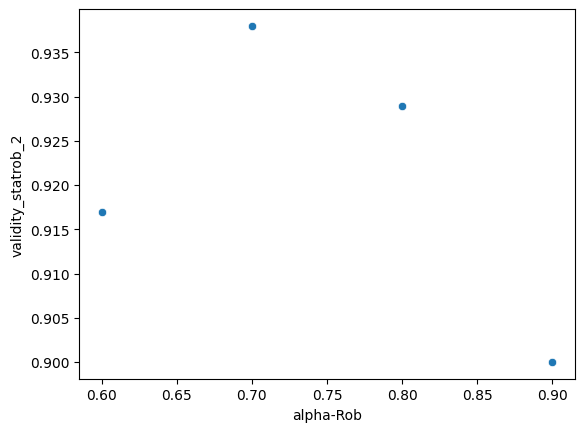

In [72]:
sns.scatterplot(data=df, x='alpha-Rob', y='validity_statrob_2')